In [1]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random

In [2]:
# Imports the Google Cloud client library
import re 
def has_cyrillic(text):
    return bool(re.search('[а-яА-Я]', text))

from google.cloud import translate
def trans(input_text):
    translated = False
    if has_cyrillic(input_text) == True:
        # Instantiates a client
        translate_client = translate.Client()
        # The text to translate
        text = input_text
        # The target language
        target = 'en'
        translation = translate_client.translate(
            text,
            target_language=target)
#        print('Text: {}'.format(text))
#        print('Translation: {}'.format(translation['translatedText']))
        x = format(translation['translatedText'])
        translated = True
    else: x = input_text     
#    print(x)
    return x, translated

In [3]:
### Function to save results as .txt files
import pickle
def pick(file, name):
    with open('./ira_txt_1/' + name + '.txt', "wb") as fp:   #Pickling
        pickle.dump(file, fp)
def unpick(name):
    with open('./ira_txt_1/' + name + '.txt', "rb") as fp:   # Unpickling
        file = pickle.load(fp)
    return file

In [4]:
names = ['user_info_trans','hashtags','urls','clients','langs','followed','replies']
user_info = unpick(names[0])

#dicts = [{},{},{},{},{},{},{}]
#for i in range(len(dicts)):
#    dicts[i] = unpick(names[i])
#user_info = dicts[0]
#hashtags = dicts[1]
#urls = dicts[2]
#clients = dicts[3]
#langs = dicts[4]
#followed = dicts[5]
#replies = dicts[6]

In [5]:
ids = set()
user_val = {}
user_n = {}
i = 0
for user in user_info:
    user_val[i] = user
    user_n[user] = i
    ids.add(user)
    i += 1

def uid(i):
    return user_val[i]

def un(user):
    return user_n[user]

In [6]:
loc = unpick('loc')
test = loc[3]
print(len(test))

96


In [7]:
for i in range(len(loc)):
    clust = loc[i]
    users = []
    for j in range(len(clust)):
        users.append(clust[j])
    if i != 0: print('Cluster ', i, ': ', users)

Cluster  1 :  [1, 26, 71, 84, 118, 133, 165, 267, 311, 386, 456, 485, 502, 538, 585, 672, 715, 831, 906, 943, 998, 1009, 1015, 1067, 1132, 1163, 1232, 1251, 1284, 1344, 1437, 1449, 1476, 1497, 1515, 1720, 2265, 2367, 2483, 2567, 2628, 2641, 2646, 2847]
Cluster  2 :  [4, 5, 7, 15, 16, 21, 22, 24, 27, 35, 36, 37, 40, 42, 43, 45, 49, 53, 62, 63, 65, 66, 67, 72, 73, 77, 79, 80, 85, 86, 92, 93, 95, 97, 98, 103, 105, 106, 108, 109, 110, 120, 124, 125, 129, 138, 146, 149, 151, 154, 156, 158, 160, 167, 168, 170, 171, 175, 177, 180, 186, 189, 194, 195, 200, 201, 215, 216, 218, 222, 228, 233, 236, 241, 244, 245, 250, 252, 261, 262, 264, 268, 274, 275, 278, 280, 281, 284, 286, 287, 288, 289, 290, 295, 300, 302, 305, 309, 316, 318, 321, 327, 328, 330, 333, 335, 338, 339, 340, 341, 343, 348, 352, 365, 368, 369, 370, 371, 381, 382, 385, 391, 392, 395, 397, 401, 402, 403, 411, 414, 415, 426, 430, 431, 433, 438, 444, 445, 446, 448, 460, 461, 464, 468, 473, 474, 475, 477, 478, 481, 483, 487, 490, 494, 

In [8]:
#untrans_info = unpick('user_info')
#user_info = unpick('user_info')
user_info = unpick('user_info_trans')

In [9]:
for u in user_info:
    print(user_info[u])

['249064136b1c5cb00a705316ab73dd9b53785748ab757f02df7e7a9876906139', '249064136b1c5cb00a705316ab73dd9b53785748ab757f02df7e7a9876906139', 'Moscow, Russia', 'I am an exemplary family man!', '132', '120', 'ru', True]
['0974d5dbee4ca9bd6c3b46d62a5cbdbd5c0d86e196b624dbfc7d18cf17b3eab5', '0974d5dbee4ca9bd6c3b46d62a5cbdbd5c0d86e196b624dbfc7d18cf17b3eab5', 'Russia', 'Telephonist. Learning history Playing in the amateur theater - Kites,', '74', '8', 'en', True]
['bda40f262856eee77c48a332e5eb23bc4f1943d600867d4194d89b1235b17ee0', 'bda40f262856eee77c48a332e5eb23bc4f1943d600867d4194d89b1235b17ee0', 'Ryazan', 'the waves and splash purple wave', '165', '454', 'en', True]
['a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf340e69363f596ad9551e', 'a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf340e69363f596ad9551e', '', 'I answer any #President', '4430', '4413', 'ru', True]
['95b3aba6b9140f5dda993148de174ff57d62f4a6e68e886a1927a130b328e14f', '95b3aba6b9140f5dda993148de174ff57d62f4a6e68e886a1927a130b328e14f', '

['edf4217fb730df6dbbba1a79292336337aea300bcedd996073fc142301cf1060', 'edf4217fb730df6dbbba1a79292336337aea300bcedd996073fc142301cf1060', 'Novgorod', 'Biologist', '626', '521', 'en', True]
['a25b9901eb3fbfcc34baff27b8d091f79d44b3738dce525df318b48f155f2a27', 'a25b9901eb3fbfcc34baff27b8d091f79d44b3738dce525df318b48f155f2a27', '', 'It is clear - and the end of the dialogue', '125', '505', 'ru', True]
['3d04d5ba2fc6601dbcba5aa5d2006ed241f988e3eb92ca68d515df2e7c821b3c', '3d04d5ba2fc6601dbcba5aa5d2006ed241f988e3eb92ca68d515df2e7c821b3c', 'Tallahassee', '', '81', '361', 'en', False]
['ce7b9f8c86dfbf9b2bd03eda62f0d42ac1c2b1b593ba0b0b052210acf652f896', 'ce7b9f8c86dfbf9b2bd03eda62f0d42ac1c2b1b593ba0b0b052210acf652f896', 'USA', "'As long as we try, maybe things will change' -pac #BlackLivesMatter #PrayForTheWorld", '876', '950', 'en', False]
['69ee37037eddb0f7557afdf006f9a3c5c795b7166c8264b33dc514e28bd223fe', '69ee37037eddb0f7557afdf006f9a3c5c795b7166c8264b33dc514e28bd223fe', 'CSO', '', '178', '73

['6a5fbb0f91aea65d7f9747add765006a4f4124250144687410662f94efde1312', '6a5fbb0f91aea65d7f9747add765006a4f4124250144687410662f94efde1312', 'ufa', '#Killjoy # СериальныйЗадрот #Echelon #Supernatural #AmericanHorrorStory #DW #Merlin #TeenWolf', '265', '480', 'ru', True]
['e29cf564295188f03978fee5c1b0c46d54731d559d8bb5eea245f267d4b3ef3d', 'e29cf564295188f03978fee5c1b0c46d54731d559d8bb5eea245f267d4b3ef3d', 'Novosibirsk', 'You should look at the day like a little life ...', '3', '41', 'ru', True]
['19038f163f8b903adb0ecfc70940c167d019ae66b03be3f56c29564583d30bcc', '19038f163f8b903adb0ecfc70940c167d019ae66b03be3f56c29564583d30bcc', 'USA', '', '91', '130', 'en', False]
['b180d9485b2b2ddaae509e6e90d70a61b157c8a290dc1f0bdda79e5df4c0e15e', 'b180d9485b2b2ddaae509e6e90d70a61b157c8a290dc1f0bdda79e5df4c0e15e', '', '', '100', '100', 'en', False]
['5838c3c419e0a51b6af6d63faad6688de4ac7a6f74fbba456906e93ab4012084', '5838c3c419e0a51b6af6d63faad6688de4ac7a6f74fbba456906e93ab4012084', 'US', 'There are no tr

['56ebdee129acc3b1b981b50899269cdadb30758f8a51119e2b138658fe935722', '56ebdee129acc3b1b981b50899269cdadb30758f8a51119e2b138658fe935722', 'US', 'I have learned over the years that when one’s mind is made up, this diminishes fear.', '163', '165', 'en', False]
['f92df3d9ae9130e9df1038765bc0f1e2c75646443cab0f0eb45f9a18cda83b4e', 'f92df3d9ae9130e9df1038765bc0f1e2c75646443cab0f0eb45f9a18cda83b4e', '', '', '19', '5', 'en', False]
['c0d414c1289864343e922f13194aa81848ac371275bfc30cd2863f3dfe4570c0', 'c0d414c1289864343e922f13194aa81848ac371275bfc30cd2863f3dfe4570c0', 'USA', 'Forget all the reasons it won’t work and believe the one reason that it will.', '103', '473', 'en', False]
['68d26fcc636fc03e21805c728e7bbc5cd1d0ca6a48179c4b020954c1072bb9ab', '68d26fcc636fc03e21805c728e7bbc5cd1d0ca6a48179c4b020954c1072bb9ab', '', '', '99', '149', 'en', False]
['4f270cf2cc09b554bf22c7eef10c3a61a146c03b69fe5085f91c315ecda480b0', '4f270cf2cc09b554bf22c7eef10c3a61a146c03b69fe5085f91c315ecda480b0', 'Moscow', '',

['40a798791f69f7835dc04ed08248658d07bc515ba529a62670a856a1a5b0f536', '40a798791f69f7835dc04ed08248658d07bc515ba529a62670a856a1a5b0f536', 'Tula, Russia', 'I live the truth', '136', '215', 'ru', True]
['61fd58de0fba18a0d40fedb10874e5fdcd14c8b9b4494477cc6ec75f5ce962b0', '61fd58de0fba18a0d40fedb10874e5fdcd14c8b9b4494477cc6ec75f5ce962b0', '', '', '17', '157', 'ru', False]
['37b9e566e03bc254c7f02e5b52e8aaaf0478c34f279a21eb1c25f6f905b4ee51', '37b9e566e03bc254c7f02e5b52e8aaaf0478c34f279a21eb1c25f6f905b4ee51', 'CSO', 'I like to talk about myself', '150', '187', 'ru', True]
['4ec1ef023812e2667c109fcf22172e246df7f1e88073aba76cd1b0eab12d4aa6', '4ec1ef023812e2667c109fcf22172e246df7f1e88073aba76cd1b0eab12d4aa6', 'Atlanta', 'Travel advocate', '4228', '4023', 'en', False]
['863d108d164c74a90cd777e37baafc85ee5ef41879c52b2dbff25efb0125245c', '863d108d164c74a90cd777e37baafc85ee5ef41879c52b2dbff25efb0125245c', 'Moscow', 'with experience, Tractor driver: all about: Karting; Dating - Hand-made -', '55', '7'

['0105e08292e57e3bc201e097ac85752a7a1e17e6d2c1886c2233df0d6b683eaa', '0105e08292e57e3bc201e097ac85752a7a1e17e6d2c1886c2233df0d6b683eaa', '', 'I love you. https://t.co/02XzbFcEAc', '17', '193', 'ru', False]
['914e6510f11a9f61c47194d577bb59fc0e38ff0e0270a297359c5c1a5106b806', '914e6510f11a9f61c47194d577bb59fc0e38ff0e0270a297359c5c1a5106b806', 'Queens, NY', "One advantage of talking to yourself is that you know at least somebody's listening", '2', '56', 'en', False]
['2ea617f5a6d0c50dd0a3d9ce16dc95718a94dacaf6251c286f98b73f7ff264ce', '2ea617f5a6d0c50dd0a3d9ce16dc95718a94dacaf6251c286f98b73f7ff264ce', 'USA', 'Liar', '163', '155', 'en', False]
['4c12c714bf981f5eaa4112c7cc682333e088bd6d31e2905ec254de93f295fbda', '4c12c714bf981f5eaa4112c7cc682333e088bd6d31e2905ec254de93f295fbda', 'Stanwood city, WA, USA', 'Editorial Writer For The New York Times: Education, Criminal Justice, Economics,  Affordable Housing, Pop Culture.', '0', '143', 'en', False]
['7b2a65f6a9e318a70e34a98accd20845da79b5b4d79ce

In [10]:
#for i in studyR:
#    if user_lexical(i)[2] != '': 
#        if user_lexical(i)[1] != True: 
#            print(i, 'ENG: ', user_lexical(i)[2])
#        else: 
#            print(i, 'RUS: ', user_lexical(i)[2])

In [11]:
print(studyR)
print(studyE)

NameError: name 'studyR' is not defined

In [11]:
R = [827, 994, 1912, 2210, 2572, 2588, 2821]
E = [137, 292, 410, 791, 840, 861, 942, 1046, 1064, 1142, 1149, 1373, 1389, 1489, 1923, 2032, 2375, 2523, 2541, 2525, 2671, 2745, 2826]

In [12]:
#for i in test:
#    ui = uid(i)
#    print(i, untrans_info[ui][3])

### LEXICAL INFO

LANG / ALLIGNMENT

In [13]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

allwords = unpick('allwords')

#for i in range(len(loc)):
#    test = loc[i]
#    words = {}
#    print('Cluster: ' ,i)
#    num, soc, lex = profile(test)
#    TEXT = lex[1]
#    print(lex[0])
#    if i != -1:
#        for j in range(len(TEXT)):
#            print(TEXT[j][1])
#            print(TEXT[j][2])
#            s = TEXT[j][2]
#            s = re.findall(r'[^\s!,.?":;0-9]+', s)
#            print(s)
#            for st in s:
#                st = st.lower()
#                if st not in stops:
#                    if st in words: words[st] += 1
#                    else: words[st] = 1
#    L = []
#    for w in words:
#        if words[w] > 3:
#            L.append((words[w],w))
#    L.sort(key=lambda tup: tup[0])
#    L.reverse()
#    print(L)
#    
#    present_num(num)
#    present_social(soc, test)
#
#print(len(allwords))
##pick(allwords, 'allwords')
#allwords = unpick('allwords')

L = []
for w in allwords:
    if allwords[w] > 0:
        L.append((allwords[w],w))
L.sort(key=lambda tup: tup[0])
L.reverse()
#print(L)

In [14]:
temp = []
for tup in L:
    n, w = tup
    if 'pot' in w:
        temp.append(w)
        print(tup)
print(temp)

(4, '@potus')
(3, '#potus')
(2, '#supportpotus')
(1, 'potomac')
(1, '#harrypotter')
(1, '#potustrump')
(1, 'kapotnya')
['@potus', '#potus', '#supportpotus', 'potomac', '#harrypotter', '#potustrump', 'kapotnya']


In [15]:
changed = 0
for user in user_info:
    DATA = user_info[user]
#    print(DATA[3])
    if DATA[-2] == 'ru' and DATA[3] == '': 
        if DATA[-1] == False:
            changed += 1
        DATA[-1] = True
print(changed)

114


In [16]:
for user in user_info:
    temp = user_info[user]
    print(temp)
#    if temp[-2] == 'ru': temp[-1] = True
    break

['249064136b1c5cb00a705316ab73dd9b53785748ab757f02df7e7a9876906139', '249064136b1c5cb00a705316ab73dd9b53785748ab757f02df7e7a9876906139', 'Moscow, Russia', 'I am an exemplary family man!', '132', '120', 'ru', True]


In [17]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\macki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
bwords = ['black','#blm','#blacklivesmatter','#blacktolive'] + ['black', '#blacklivesmatter', '#blacktolive', '#blacktivist', '#blackpride', '#black', 'blacktivist', 'problack', 'blackmail', '#blackpower', 'blackhole', 'blacker', '#allblacklivesmatter', '#blacklivesalwaysmattered', '#teamblack', 'blacktolive@gmail', '#blackgirlsmagic', '#blackmattersus', '#blacktwitter', '#blackliberationmovement', '/musicholic/#blacklivesmatter', '#allblackeverything', 'blackness', '#blackexcellence', '#blacklivesmatters', '#blacklivesalwaysmatter', '“#blacklivesmatter”', 'pro-black', '#blackandproud', '#allblacklivesmatter/']
bacon = ['bacon']
plain = ['student'] + ['live', 'love', 'life']
lib = ['obama', 'liberal', 'liberals', 'activist']
cwords = ['conservative', 'constitution', '#conservative', 'constitutional', '#tcot', '#pjnet', '#rednationrising']
trumps = ['trump', '#trump', '#trumptrain','#maga','maga'] + ['trump', '#trump', '#trumptrain', 'trump/pence', '#trumptop', '#istandwithtrump', '@realdonaldtrump', '#trumpfor', 'trump=illegitimate', 'trump/back', '@realtrumpcast', '#thankgodtrumpwon', 'trump‼️follow', '#trumparmy', '#trumpstrong', '#latinoswithtrump', '🇺🇸trump', '@tenacioustrumps', 'trump🇱🇷', '#whitesfortrump', '👊trump', 'trumpsters', 'pro-trump', '#potustrump', 'trump’s', '#trumppence']
pat = ['patriot', '#patriot', 'patriotism'] + ['america', 'american', '#wakeupamerica', '#godblessamerica'] + ['us', 'usa', '#ingodwetrust', '#godblessamerica']
religion = ['god'] + ['christian', '#christian']

neutral = plain + bacon
news = ['news'] + ['politics', 'political'] + ['sports', 'sport'] + ['media'] + ['breaking'] + ['journalist'] + ['local']
left = bwords + lib
right = cwords + trumps + pat + religion

allwords = unpick('allwords')

In [19]:
print(right)

['conservative', 'constitution', '#conservative', 'constitutional', '#tcot', '#pjnet', '#rednationrising', 'trump', '#trump', '#trumptrain', '#maga', 'maga', 'trump', '#trump', '#trumptrain', 'trump/pence', '#trumptop', '#istandwithtrump', '@realdonaldtrump', '#trumpfor', 'trump=illegitimate', 'trump/back', '@realtrumpcast', '#thankgodtrumpwon', 'trump‼️follow', '#trumparmy', '#trumpstrong', '#latinoswithtrump', '🇺🇸trump', '@tenacioustrumps', 'trump🇱🇷', '#whitesfortrump', '👊trump', 'trumpsters', 'pro-trump', '#potustrump', 'trump’s', '#trumppence', 'patriot', '#patriot', 'patriotism', 'america', 'american', '#wakeupamerica', '#godblessamerica', 'us', 'usa', '#ingodwetrust', '#godblessamerica', 'god', 'christian', '#christian']


In [20]:
def func(desc):
    words = {}
    s = desc
    s = re.findall(r'[^\s!,.?":;0-9]+', s)
    for st in s:
        st = st.lower()
        if st not in stops:
            if st in words: words[st] += 1
            else: words[st] = 1        
    score = np.zeros(3)
    for w in news:
        if w in words: score[0] += words[w]
    for w in left:
        if w in words: score[1] += words[w]
    for w in right:
        if w in words: score[2] += words[w]
    
    result = np.where(score == np.amax(score))
    result = result[0][0]
    
    if np.sum(score) == 0: f = 'na'
    elif result == 0: f = 'news'
    elif result == 1: f = 'left'
    elif result == 2: f = 'right'
    else:
        f = 'na'
        print('shit')
    return f

In [21]:
def user_lexical(user_num):
    user = uid(user_num)
    data = user_info[user]
    desc = data[3]
    lang = data[-1]
    function = func(desc)
    return function, lang, desc

In [22]:
def group_lang(group):
    r = 0
    t = 0
    for g in group:
        t += 1
        l = user_lexical(g)[1]
        if l == True: r += 1
    return t,r

In [23]:
#for i in loc[3]:
#    print(user_lexical(i))

In [24]:
studyE = []
studyR = []
for i in loc[3]:
    if user_lexical(i)[2] != '': 
        if user_lexical(i)[1] != True: 
            studyE.append(i)
            print('ENG: ', user_lexical(i)[2])
        else: 
            studyR.append(i)
            print('RUS: ', user_lexical(i)[2])
pick(studyE,'studyE')
pick(studyR,'studyR')

ENG:  love ma family :)
ENG:  Energy and persistence conquer all things
ENG:  Director of Strategic Growth in StyleSeat
RUS:  Pediatric Resident в Weill Cornell Medical College
RUS:  Dealer: Assistance in the restoration of temples
ENG:  Shake it out
ENG:  designer, stylist
ENG:  wanna live 4ever
RUS:  Parkour. Calendars ... - with experience. Lawyer
ENG:  passion for baking
ENG:  There is no remedy for love bu
ENG:  Things do not change; we change.
ENG:  Decide that you want it more than you are afraid of it.
ENG:  Captain Marvel
ENG:  The secret of being boring is to say everything.
ENG:  love my son
RUS:  Knives: Psychology, NLP, psychological tests: Knives ...; 3 years. Commercial director
ENG:  .
ENG:  A friend is someone who knows all about you and still loves you
RUS:  on life: Border ... about me ... Old irons, Nail extensions # Tattoos, piercing,
ENG:  I can resist anything but temptation
ENG:  on the top of the world
ENG:  As he read, I fell in love the way you fall asleep: s

In [25]:
print(studyE)

[137, 292, 410, 840, 861, 942, 1046, 1064, 1142, 1149, 1373, 1389, 1489, 1923, 2032, 2375, 2523, 2525, 2671, 2745, 2826]


In [26]:
#print(group_lang(test))

In [27]:
print(len(studyE+studyR))
print(len(studyE))
test = studyE+studyR

30
21


### NUMERICAL VALUES

In [28]:
act_info = unpick('act_info')
def total_active(a_info):
    users, b = a_info.shape
    days = 3331
    created = np.zeros((users,days),int)
    posting = np.zeros((users,days),int)
    for i in range(users):
        cd, fp, lp = a_info[i]
        created[i,cd:lp+1] += 1
        posting[i,fp:lp+1] += 1
    return created, posting
created_M, posting_M = total_active(act_info)

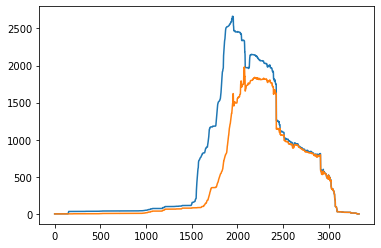

In [29]:
plt.plot(np.sum(created_M,0))
plt.plot(np.sum(posting_M,0))

In [30]:
bdm = unpick('bin_data_matrix')
dm = unpick('data_matrix')

In [31]:
total_days = np.sum(posting_M,1)
total_posts = np.sum(bdm,1)
expected = total_posts / total_days

In [32]:
def cluster_nums(group):
    size = len(group)
    tweets = dm[group]
    days = bdm[group]
    active = posting_M[group]
    
    tweets = np.sum(tweets)
    time_active = np.sum(active)
    
    tpupd = tweets / time_active
    
    cor = np.corrcoef(days)
    for i in range(size):
        cor[i,i] = 0
    cor = np.sum(cor / (size**2 - size))
    
    return size, tweets, time_active / size, tpupd, cor

In [33]:
def user_nums(user):
    tweets = dm[user]
    days = bdm[user]
    active = posting_M[user]
    
    tweets = np.sum(tweets)
    time_active = np.sum(active)
    
    tpupd = tweets / time_active
    
    return 1, tweets, time_active, tpupd, 1

In [34]:
print(cluster_nums(test))
print(user_nums(test[0]))

(30, 67578, 131.43333333333334, 17.138726857722546, 0.8633701633487972)
(1, 1319, 50, 26.38, 1)


### References

In [35]:
C_M = unpick('C_MF')
for i in range(3667):
    C_M[i,i] = 0

In [12]:
C_M = unpick('C_M')

In [13]:
for i in range(3667):
    C_M[i,i] = 0

In [19]:
X = 0
for i in range(3667):
    x = C_M[i,:]
    if np.sum(x) < 1: X += 1
print(X)

1235


In [20]:
3667 - 1235

2432

In [17]:
3667 - 1570

2097

In [36]:
def ind_mentions(user):
    rout = np.sum(C_M[user])
    rin = np.sum(C_M[:,user])
    return rout, rin

In [37]:
def group_mentions(group):
    t_out = C_M[group]
    t_in = C_M[:,group]
    
    within = C_M[group]
    within = within[:,group]
    
    t_out = np.sum(t_out)
    t_in = np.sum(t_in)
    within = np.sum(within)
    
    return t_out, t_in, within

In [38]:
print(group_mentions(test))
print(ind_mentions(test[0]))

(10774, 39936, 2556)
(352, 1406)


In [39]:
def cluster_ments(cluster):
    i = 0
    for u in cluster:
        out = C_M[u]
        men = C_M[:,u]
        out = np.sum(out)
        men = np.sum(men)
        plt.scatter(i,out,c = 'r')
        plt.scatter(i,men,c = 'g')
        i += 1
    plt.show()
    return

In [40]:
isolates = [6, 9, 13, 14, 15, 16, 18, 19, 24, 27, 28, 37, 41, 46, 49, 50, 52, 53, 54, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 69, 70, 71, 73, 74, 75, 76, 77]

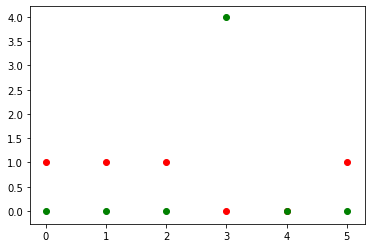

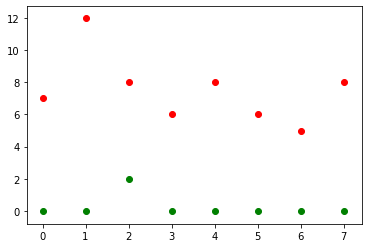

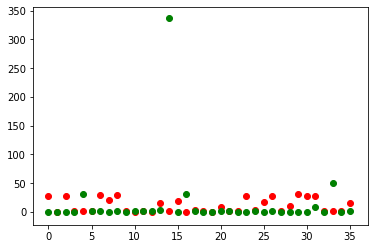

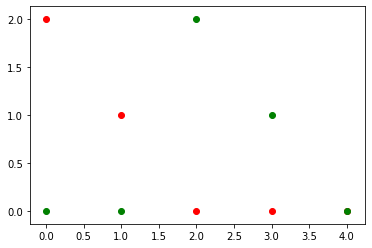

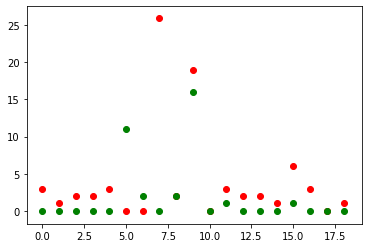

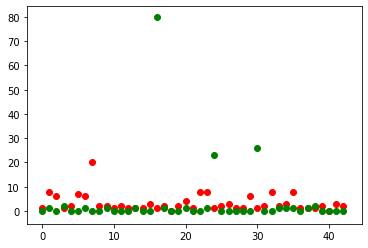

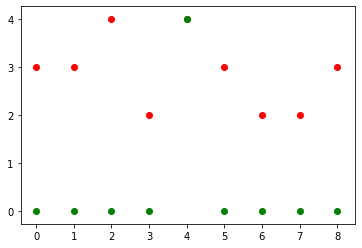

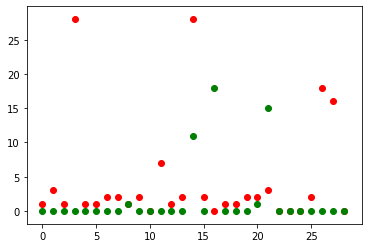

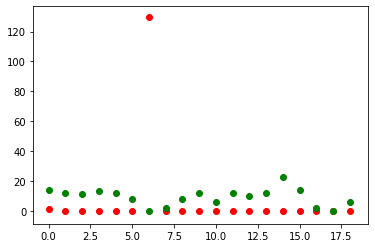

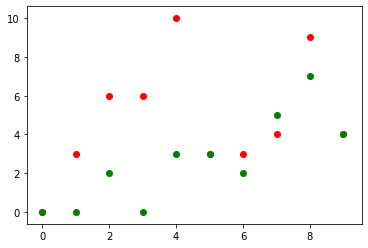

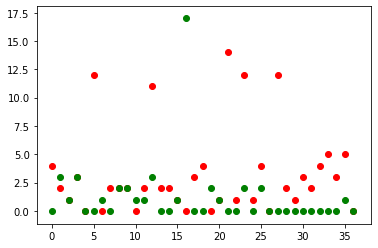

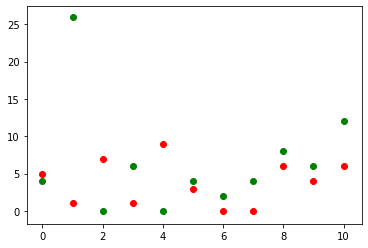

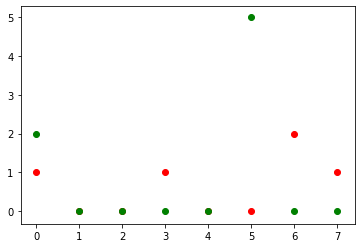

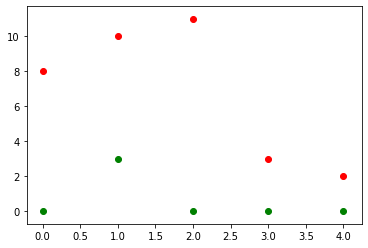

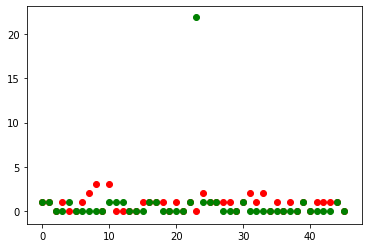

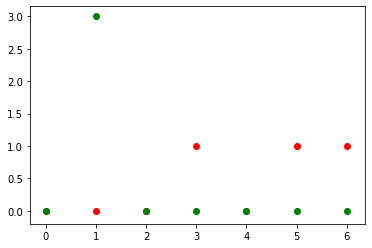

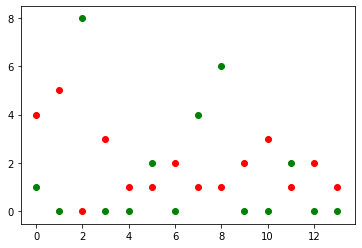

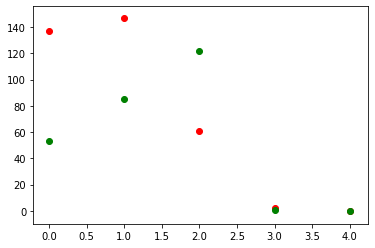

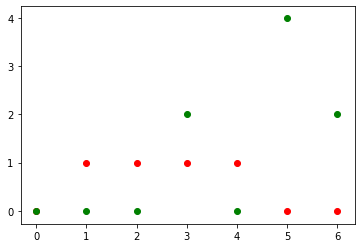

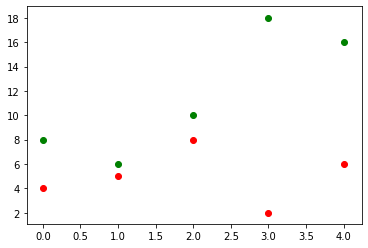

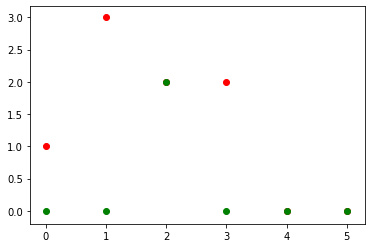

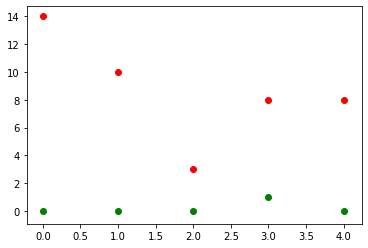

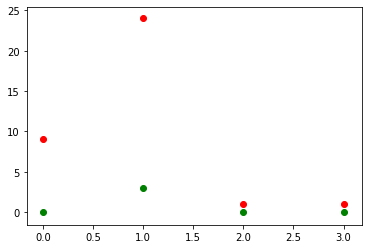

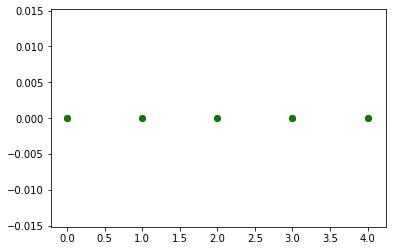

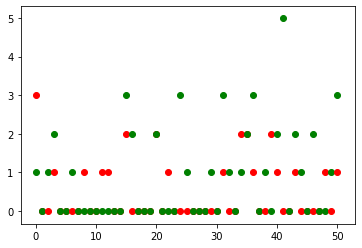

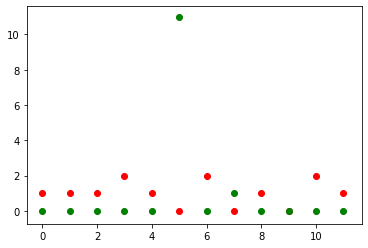

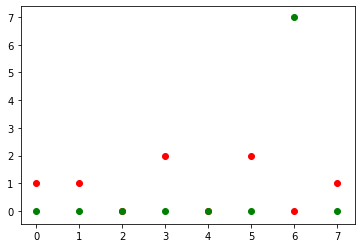

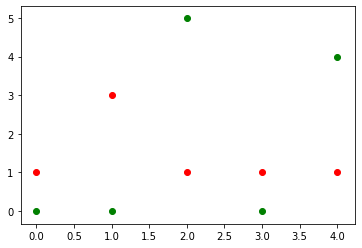

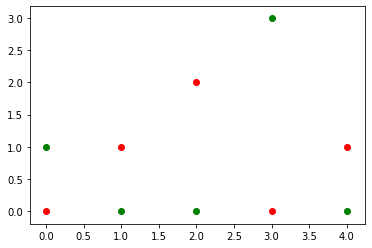

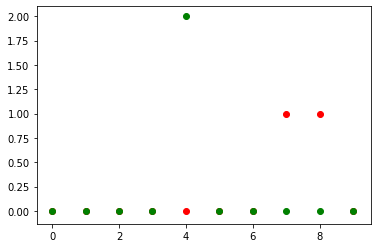

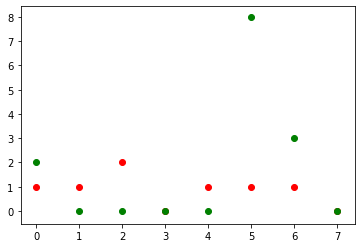

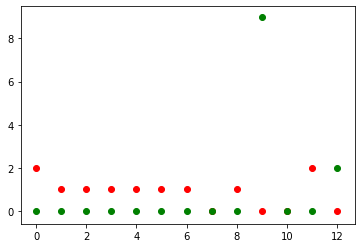

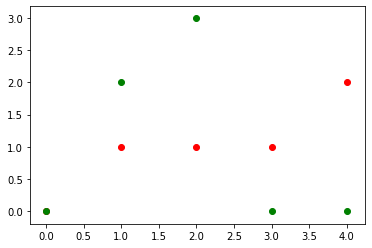

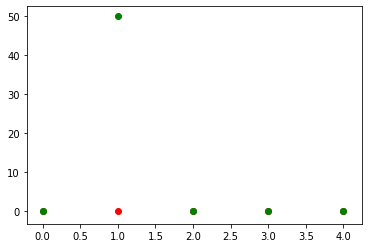

KeyboardInterrupt: 

In [41]:
for i in isolates:
    if i != 0:
        cluster_ments(loc[i])

### URL / #'s

In [42]:
urls = unpick(names[2])
hashtags = unpick(names[1])

In [43]:
ud = uid(test[0])
print(list(hashtags[ud]))
print(urls[ud])

['kind', 'likeit', 'RAP', 'badday', 'iTunes', 'normal', 'FriedrichNietzsche', 'true', ' love', 'USA', 'love', ' rap', 'pretty', 'Boston', 'nice', 'quote', ' true', 'HollywoodUndead', 'WELOVEYOUTOONIALL', 'alone', 'rap', 'Happy', ' Life', 'Israel', ' GazaUnderAttack', 'music', 'CocoChanel', 'BenjaminDisraeli', 'freedom', 'newyork', ' feelings', 'RalphEmerson', 'hope', 'johnnywinter', 'sadness', 'RAPCORE', 'fucktheworld', 'world', 'scary', 'happy', 'WeWantOneDirectionNominatedForTheVMAs', 'smart', 'hate', 'America', 'RT', ' USA', ' imho', 'OmarKhayyam', 'Kurt_Vonnegut', 'ThomasEdison', 'nostalgia', 'HappyBirthday', 'sunny', ' America', 'awesome', 'faith', 'beautiful', 'World', 'PauloCoelho', 'BrianTracy', 'MeganFoxWillBeMyGirlfriend', 'summer', 'dear', 'socrates', 'omarkhayyam', 'SomethingYouDidntKnowAboutMe', 'RobertFulghum', 'GazaUnderAttack', 'damnit', 'LifeWouldBeBetterIf', 'ZigZiglar', 'Gaza', 'usa', 'BillGates', 'lonely', 'lifewouldbebetterif', 'YOLO', 'brainburst', 'MilosRaonic', 

In [44]:
def hash_profile(group):
    profile_total = {}
    profile_unique = {}
    for user in group:
        ud = uid(user)
        tags = hashtags[ud]
        for tag in tags:
            if tag in profile_unique:
                profile_total[tag] += tags[tag]
                profile_unique[tag] += 1
            else: 
                profile_total[tag] = tags[tag]
                profile_unique[tag] = 1 
    return profile_total, profile_unique

In [45]:
def url_profile(group):
    profile_total = {}
    profile_unique = {}
    for user in group:
        ud = uid(user)
        urs = urls[ud]
        urs = list(urs)
        for url in urs:
            if url in profile_unique:
                profile_unique[url] += 1
            else: 
                profile_unique[url] = 1 
    return profile_unique

In [46]:
def social_similarity(profile):
    shared = len(profile)
    by = 0
    for item in profile:
        by += profile[item]
    return shared, by

In [47]:
U = url_profile(test)
print(social_similarity(U))

H = hash_profile(test)
H = H[1]
print(social_similarity(H))

(17278, 17360)
(302, 2485)


### Ramdom Sampling

In [48]:
sizes = list(range(5,50,5)) + [100,150,200, 500, 1000, 1500, 2000, 2500, 3667]
samples = list( np.ones(9 + 3, int) * 200 ) + [200, 200, 20 , 20, 20, 1]

totals = len(sizes)

import random

def rand_groups(N,S):
    random_groups = []
    for i in range(N):
        L = random.sample(range(3667), S)
        random_groups.append(L)
    return random_groups

In [49]:
### Correlation

res_c = []

for i in range(totals):
    data = []
    s = sizes[i]
    n = samples[i]
    groups = rand_groups(n,s)
    for g in groups:
        cor = cluster_nums(g)[-1]
        data.append(cor)
    data.sort()

    if n == 200:
        l = np.mean(data[4:14])
        m = np.mean(data)
        h = np.mean(data[-15:-5])
    if n == 20:
        l = np.mean(data[1])
        m = np.mean(data)
        h = np.mean(data[-2])
    if n == 1:
        l = m = h = np.mean(data)
    
    res_c.append([l,m,h])

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (18,) and (15,)

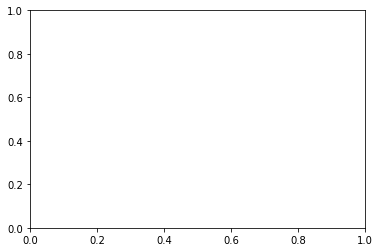

In [50]:
res_c = np.array(res_c)
for i in range(3):
    plt.plot(np.log(sizes), res_c[:,i])

In [51]:
### Mentions

In [52]:
res_m = []

for i in range(totals):
    data = []
    s = sizes[i]
    n = samples[i]
    groups = rand_groups(n,s)
    for g in groups:
        within = group_mentions(g)[-1]
        total = group_mentions(g)[0]
        within = within / total
        data.append(within)
    data.sort()

    if n == 200:
        l = np.mean(data[4:14])
        m = np.mean(data)
        h = np.mean(data[-15:-5])
    if n == 20:
        l = np.mean(data[1])
        m = np.mean(data)
        h = np.mean(data[-2])
    if n == 1:
        l = m = h = np.mean(data)
    
    res_m.append([l,m,h])

KeyboardInterrupt: 

In [ ]:
res_m = np.array(res_m)
for i in range(3):
    plt.plot(np.log(sizes), res_m[:,i])

In [ ]:
### Urls

In [ ]:
res_u = []

for i in range(totals):
    data = []
    s = sizes[i]
    n = samples[i]
    groups = rand_groups(n,s)
    for g in groups: 
        U = url_profile(g)
        U = social_similarity(U)
        within = U[0] / U[1]
        data.append(within)
    data.sort()

    if n == 200:
        l = np.mean(data[4:14])
        m = np.mean(data)
        h = np.mean(data[-15:-5])
    if n == 20:
        l = np.mean(data[1])
        m = np.mean(data)
        h = np.mean(data[-2])
    if n == 1:
        l = m = h = np.mean(data)
    
    res_u.append([l,m,h])

In [ ]:
res_u = np.array(res_u)
for i in range(3):
    plt.plot(np.log(sizes), res_u[:,i])

In [ ]:
### #'s'

In [ ]:
res_h = []

for i in range(totals):
    data = []
    s = sizes[i]
    n = samples[i]
    groups = rand_groups(n,s)
    for g in groups: 
        H = hash_profile(g)
        H = social_similarity(H[1])
        within = H[0] / H[1]
        data.append(within)
    data.sort()

    if n == 200:
        l = np.mean(data[4:14])
        m = np.mean(data)
        h = np.mean(data[-15:-5])
    if n == 20:
        l = np.mean(data[1])
        m = np.mean(data)
        h = np.mean(data[-2])
    if n == 1:
        l = m = h = np.mean(data)
    
    res_h.append([l,m,h])

In [ ]:
res_h = np.array(res_h)
for i in range(3):
    plt.plot(np.log(sizes), res_h[:,i])

In [ ]:
### Langs

In [ ]:
res_l = []

for i in range(totals):
    data = []
    s = sizes[i]
    n = samples[i]
    groups = rand_groups(n,s)
    for g in groups: 
        t,r = group_lang(g)
        within = (t-r) / t
        data.append(within)
    data.sort()

    if n == 200:
        l = np.mean(data[4:14])
        m = np.mean(data)
        h = np.mean(data[-15:-5])
    if n == 20:
        l = np.mean(data[1])
        m = np.mean(data)
        h = np.mean(data[-2])
    if n == 1:
        l = m = h = np.mean(data)
    
    res_l.append([l,m,h])

In [ ]:
res_l = np.array(res_l)
for i in range(3):
    plt.plot(np.log(sizes), res_l[:,i])

In [58]:
#all_results = [res_c,res_l,res_m,res_h,res_u]
#pick(all_results, 'all_results')
all_results = unpick('all_results')

In [59]:
### Interpolate

In [53]:
from scipy.interpolate import interp1d

interp_funcs = []

x_new = np.linspace(5, 3667, num=3663, endpoint=True)
print(x_new[0:10])
x = sizes

for i in range(5):
    res = all_results[i]

    yl = res[:,0]
    ya = res[:,1]
    yh = res[:,2]

    fl = interp1d(x, yl)
    fa = interp1d(x, ya)
    fh = interp1d(x, yh)

    plt.plot(np.log(x_new),fl(x_new))
    plt.plot(np.log(x_new),fa(x_new))
    plt.plot(np.log(x_new),fh(x_new))
    plt.show()
    
    interp_funcs.append((fl,fa,fh))

[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


NameError: name 'all_results' is not defined

In [54]:
#pick(interp_funcs,'interp_funcs')
interp_funcs = unpick('interp_funcs')

In [55]:
### Results

In [70]:
def calc_profile(clust):
    t, r = group_lang(clust)
    size, tweets, time, tpupd, cor = cluster_nums(clust)
    tout, tin , tw = group_mentions(clust)
    
    if tout == 0: tout = 1
    
    U = url_profile(clust)
    U = social_similarity(U)
    ushared, uby = U[0], U[1]
    
    if uby == 0: uby = 1
    
    H = hash_profile(clust)
    H = social_similarity(H[1])
    hshared, hby = H[0], H[1]
    
    if hby == 0: hby = 1
    
    return [ size, tweets, time, tpupd, cor, t-r, tout, tin, tw, ushared, uby, hshared, hby, cor, (t-r)/t, tw/tout, hshared / hby, ushared / uby ]

In [71]:
profiles = {}
for i in range(len(loc)):
    profiles[i] = calc_profile(loc[i])
#pick(profiles, 'profiles')

In [77]:
accy = 0
for i in range(len(loc)):
    prof = profiles[i]
    cluster = i
    size = prof[0]
    tweets = prof[1]
    time = prof[2]
    cor = prof[4]
    lang = prof[14]
    hetro = prof[15]
    hss = prof[16]
    uss = prof[17]
    print(cluster, ':',size ,':',tweets ,':', "{:.2f}".format(time) ,':', "{:.2f}".format(cor) ,':', "{:.2f}".format(lang) ,':', "{:.2f}".format(hetro) ,':', "{:.2f}".format(hss) ,':', "{:.2f}".format(uss))
    if i != 0: accy += size * cor

0 : 1811 : 2722156 : 512.32 : 0.05 : 0.66 : 0.47 : 0.28 : 0.77
1 : 44 : 242248 : 290.00 : 0.95 : 0.02 : 0.00 : 0.11 : 0.98
2 : 502 : 2424758 : 605.54 : 0.83 : 0.13 : 0.18 : 0.10 : 0.41
3 : 96 : 167785 : 103.92 : 0.88 : 0.91 : 0.94 : 0.04 : 0.99
4 : 97 : 1800561 : 848.15 : 0.64 : 0.40 : 0.66 : 0.69 : 0.99
5 : 18 : 6171 : 44.78 : 0.92 : 1.00 : 0.15 : 0.31 : 0.34
6 : 6 : 8601 : 32.00 : 0.91 : 1.00 : 1.00 : 0.17 : 0.19
7 : 43 : 167487 : 202.58 : 0.75 : 0.47 : 0.05 : 0.77 : 0.99
8 : 46 : 319435 : 960.93 : 0.78 : 1.00 : 0.02 : 0.43 : 0.78
9 : 8 : 917 : 10.00 : 0.88 : 1.00 : 0.03 : 0.40 : 0.35
10 : 12 : 3741 : 177.50 : 0.79 : 1.00 : 0.00 : 0.48 : 0.29
11 : 13 : 100879 : 1155.85 : 0.83 : 0.00 : 0.04 : 0.31 : 0.69
12 : 111 : 47252 : 69.32 : 0.71 : 1.00 : 0.00 : 0.10 : 0.18
13 : 36 : 115017 : 21.08 : 0.91 : 1.00 : 1.00 : 0.61 : 0.59
14 : 5 : 1584 : 1.00 : 1.00 : 1.00 : 1.00 : 0.38 : 0.33
15 : 19 : 7599 : 85.74 : 0.79 : 1.00 : 0.38 : 0.25 : 0.54
16 : 43 : 42217 : 11.21 : 0.83 : 1.00 : 1.00 : 0.55

In [79]:
print(accy / 1786)

0.870687534635539


In [58]:
results = []
#results.append(['Cluster','Accounts','Tweets', 'Time Active (days)', 'Mentions', 'Mentioned', 'Within Cluster Mentions', 'Avg. Correlation', ])
for p in profiles:
    x = profiles[p]
    
    a,b,c,d,e = x[-1]
    size = x[0]
    tweets = x[1]
    time = x[2]
    
    results.append([size,tweets,time,a,b,c,d,e])

In [59]:
import csv
with open('res.csv', mode='w') as res:
    employee_writer = csv.writer(res)
    for i in range(len(results)):
        employee_writer.writerow([i] + results[i])

In [60]:
sizes = []
times = []
tweets = []
tpupds = []
scores = []

for p in profiles:
    prof = profiles[p]
    sizes.append(prof[0])
    scores.append(prof[-1])
    times.append(prof[2])
    tpupds.append(prof[3])
    tweets.append(prof[1])
    
scores = np.array(scores)

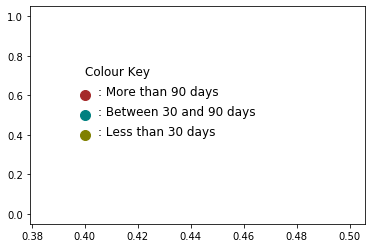

In [61]:
cols = []
for j in range(len(sizes)):
    if times[j] < 30: cols.append('olive')
    elif times[j] < 90: cols.append('teal')
    else:  cols.append('brown')
        
plt.text(0.405, 0.4, ': Less than 30 days', color="Black", fontsize=12)
plt.text(0.405, 0.5, ': Between 30 and 90 days', color="black", fontsize=12)
plt.text(0.405, 0.6, ': More than 90 days', color="black", fontsize=12)
plt.text(0.4, 0.7, 'Colour Key', color="black", fontsize=12)

plt.scatter(0.4, 0.4, s = 100, c = 'olive')
plt.scatter(0.4, 0.5, s = 100, c = 'teal')
plt.scatter(0.4, 0.6, s = 100, c = 'brown')
plt.scatter(0.5, 1, s = 0, c = 'brown')
plt.scatter(0.5, 0, s = 0, c = 'brown')

plt.show()

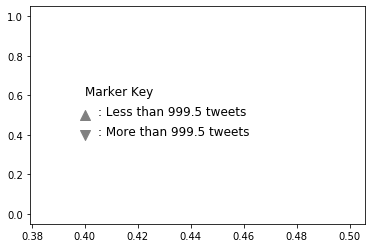

In [62]:
marks = []
for j in range(len(sizes)):
    if tweets[j] < 1000: marks.append('v')
    else:  marks.append('^')
        
plt.text(0.405, 0.4, ': More than 999.5 tweets', color="Black", fontsize=12)
plt.text(0.405, 0.5, ': Less than 999.5 tweets', color="black", fontsize=12)
plt.text(0.4, 0.6, 'Marker Key', color="black", fontsize=12)

plt.scatter(0.4, 0.4, s = 100, c = 'gray', marker = 'v')
plt.scatter(0.4, 0.5, s = 100, c = 'gray', marker = '^')

plt.scatter(0.5, 1, s = 0, c = 'brown')
plt.scatter(0.5, 0, s = 0, c = 'brown')

In [63]:
weights = []
for j in range(len(sizes)):
    xt = np.log(tpupds[j] + 5)
    weights.append(xt)

In [64]:
print(min(sizes))
print(len(sizes))

4
78


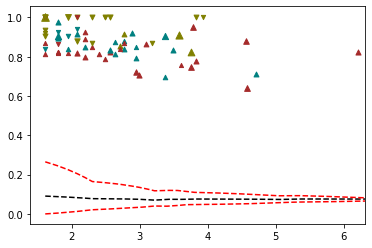

Within expected range:  0 Outside expected range:  77


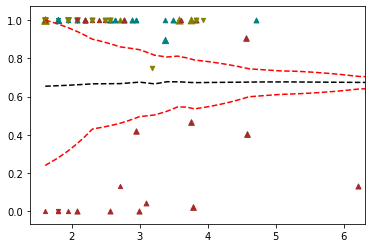

Within expected range:  14 Outside expected range:  63


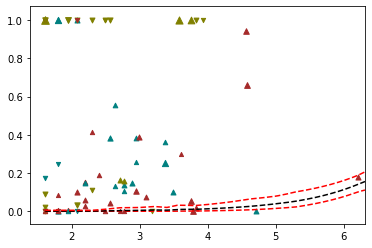

Within expected range:  17 Outside expected range:  60


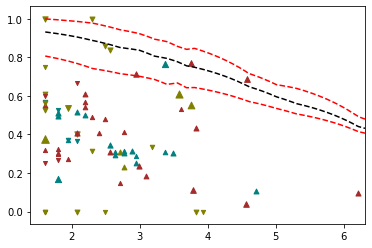

Within expected range:  8 Outside expected range:  69


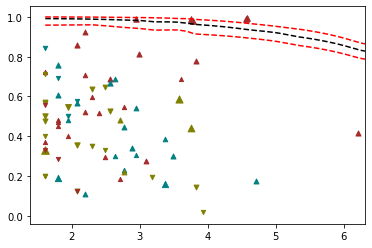

Within expected range:  5 Outside expected range:  72


In [69]:
from scipy.stats import binom

for i in range(5):
    
    not_sig = 0
    
    fl,fa,fh = interp_funcs[i]    
    for j in range(len(sizes)):
        if j != 0 and sizes[j] != 4:
            
            size = sizes[j]
            score = scores[j,i]
            col = cols[j]
            mar = marks[j]
            w = weights[j]
            
            if i == 0 or i == 1:
                if score <= fh(size):
                    if score >=fl(size): not_sig += 1
            
            if i == 2:
   #             print(score, size, fh(size))
                if score <= fh(size): not_sig += 1
            
            if i == 3 or i == 4:
                if score >=fl(size): not_sig += 1
            
            plt.scatter(np.log(size), score, c = col, marker = mar, s = w * 10)
            
    plt.xlim(np.log(4), np.log(max(sizes[1:])+50))
    
    plt.plot(np.log(x_new), fl(x_new), c = 'r', linestyle='dashed')
    plt.plot(np.log(x_new), fa(x_new), c = 'black', linestyle='dashed')
    plt.plot(np.log(x_new), fh(x_new), c = 'r', linestyle='dashed')
    plt.show()
    print('Within expected range: ', not_sig,'Outside expected range: ', 77 - not_sig)
    
#    print(binom.cdf(not_sig,77,0.9))
    

In [151]:
### Function / allignment

In [152]:
def group_function(cluster):
    fs = np.zeros(4,int)
    for user in cluster:
        [f, l] = user_lexical(user)[0:2]
        if f == 'na': fs[0] += 1
        elif f == 'news': fs[1] += 1
        elif f == 'left': fs[2] += 1
        elif f == 'right': fs[3] += 1
        else: print('Oops')
    return fs

In [153]:
def group_desc(cluster):
    for user in cluster:
        print(user_lexical(user))
    return

In [ ]:
group_desc(x)

In [196]:
gd = []
for i in range(len(loc)):
    x = loc[i]
    y = group_function(x)
    gd.append(y)
    if np.sum(y[1:] > 0):
        print(i,': ',y)
#        group_desc(x)

0 :  [1536   65   59  151]
2 :  [472  16   3  11]
4 :  [41 46  4  6]
6 :  [0 3 0 3]
7 :  [21 22  0  0]
8 :  [21  1 24  0]
11 :  [10  3  0  0]
12 :  [108   1   0   2]
13 :  [ 5  2  0 29]
15 :  [18  0  0  1]
16 :  [ 4  1  3 35]
18 :  [8 0 0 1]
19 :  [ 5  0  0 24]
20 :  [11  8  0  0]
21 :  [20  0  1  1]
26 :  [16  2  0  2]
30 :  [27  0  1  1]
33 :  [1 0 0 8]
34 :  [6 2 0 0]
39 :  [8 0 0 1]
40 :  [6 0 0 1]
42 :  [5 0 0 1]
48 :  [5 0 0 1]
49 :  [ 5  0  1 40]
54 :  [5 1 0 1]
63 :  [46  4  0  1]
64 :  [10  0  0  2]
65 :  [1 1 0 6]
66 :  [3 2 0 0]
67 :  [4 1 1 0]
68 :  [3 0 0 2]
75 :  [1 0 0 4]


In [197]:
pick(gd, 'gd')

In [155]:
def to_f(f):
    if np.sum(f[1:]) == 0: fu = 'na'
    else:
        most = np.argmax(f[:])
        if most == 1: fu = 'news'
        elif most == 2: fu = 'left'
        elif most == 3: fu = 'right'
        else: fu = 'na'
    return fu

In [156]:
print(scores[:,1])

[0.66261734 0.02272727 0.13346614 0.90625    0.40206186 1.
 1.         0.46511628 1.         1.         1.         0.
 1.         1.         1.         1.         1.         1.
 1.         0.89655172 0.42105263 0.04545455 1.         1.
 1.         1.         0.         1.         1.         1.
 1.         1.         1.         1.         0.         1.
 0.13333333 1.         1.         1.         0.         1.
 1.         1.         0.         0.         1.         1.
 0.         1.         1.         0.75       1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.         1.         1.         1.         1.
 1.         0.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [195]:
R = []
E = []
M = []
lang_map = []

for i in range(len(loc)):
    if scores[i,1] == 1:
        E.append(i)
        lang_map.append('b')
    elif scores[i,1] == 0:
        R.append(i)
        lang_map.append('r')
    else:
        M.append(i)
        lang_map.append('g')
        
pick(lang_map,'lang_map')

In [158]:
Classes = []
i = 0
for clust in loc:
    f = group_function(clust)
    ft = to_f(f)
 #   print('C: ', i, ':', ft, ':', f)
    Classes.append(ft)
    i += 1

In [159]:
### Cluster references

In [187]:
def lookup(user):
    for i in range(len(loc)):
        if user in loc[i]: return i
    return -1

print(np.sum(C_M))

I, J = C_M.shape

refM = np.zeros((len(loc),len(loc)))
refM2 = np.zeros((len(loc),len(loc)))

for i in range(I):
    for j in range(J):
        var = C_M[i,j]
        ii = lookup(i)
        jj = lookup(j)
        refM[ii,jj] += var
        if var > 0: 
            var = 1
            refM2[ii,jj] += var

2122512


In [ ]:
#pick(refM, 'refM')
#pick(refM2, 'refM2')

In [161]:
refM2 = unpick('refM2')
refM = unpick('refM')

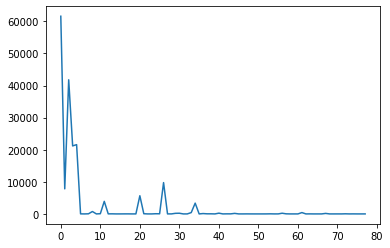

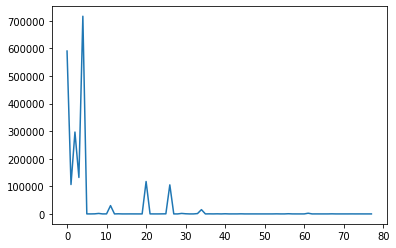

In [188]:
for i in range(len(loc)):
    refers = np.sum(refM2,0)
    plt.plot(refers)
    plt.show()
    break
    
for i in range(len(loc)):
    refers = np.sum(refM,0)
    plt.plot(refers)
    plt.show()
    break

In [ ]:
cnet = np.copy(refM)

In [162]:
mask = np.copy(refM2) + 1
mask = np.log(mask)

props = np.copy(refM2)
props[mask < 2] = 0

for i in range(len(loc)):
    props[i,i] = 0

for i in range(len(loc)):
    if np.sum(props[i]) > 0:
        props[i] = props[i] / len(loc[i])

In [43]:
for i in range(len(loc)):
    if np.sum(cnet[i]) != 0:
        cnet[i] = cnet[i] / np.sum(cnet[i])

for i in range(len(loc)):
    for j in range(len(loc)):
        if cnet[i,j] < 0.05: cnet[i,j] = 0

for i in range(len(loc)):
    cnet[i,i] = 0
    
cnet[0] = 0
cnet[:,0] = 0
print(cnet.shape)

NameError: name 'cnet' is not defined

In [163]:
color_map_2 = []
for j in range(len(loc)):
    i = Classes[j]
    if i == 'na': color_map_2.append('gray')
    elif i == 'news': color_map_2.append('green')
    elif i == 'left': color_map_2.append('blue')
    elif i =='right': color_map_2.append('red')

In [164]:
from networkx.drawing.nx_agraph import graphviz_layout

In [165]:
print(len(color_map_2))

78


In [166]:
def draw_circle(x,y,n,r):
    points = []
    th = (2*np.pi) / n
    for i in range(n):
        xv = x + r * np.sin(th * i)
        yv = y + r * np.cos(th * i)
        points.append([xv,yv])
    return points

In [173]:
import networkx as nx

G = nx.from_numpy_matrix(props, create_using=nx.DiGraph())

#G.remove_nodes_from(MI)
#G.remove_nodes_from(RU)

pos=nx.spring_layout(G, k = 2.5, seed = 5)

print(0.5 * len( [ 1 for (u,v) in G.edges() if u in G[v] ] ) )

cmap = []
for i in G.nodes():
    cmap.append(color_map_2[i])

56.0


In [168]:
cmap = []
for i in G.nodes():
    cmap.append(lang_map[i])

[[ 0.          5.        ]
 [ 4.75528258  1.54508497]
 [ 2.93892626 -4.04508497]
 [-2.93892626 -4.04508497]
 [-4.75528258  1.54508497]]


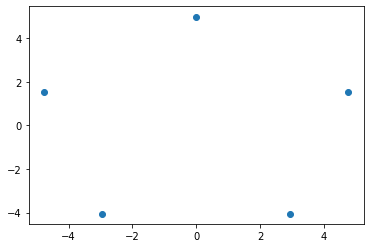

In [169]:
vals = np.array(draw_circle(0,0,5,5))
print(vals)
plt.scatter(vals[:,0],vals[:,1])

In [170]:
Ep = draw_circle(-1.5,0,len(E) - len(list(nx.isolates(G))) + 1 ,1)
Rp = draw_circle(1,0,len(R),0.5)
Mp = draw_circle(0,0,len(M),0.5)

In [174]:
Ep = draw_circle(-1.5,0,len(E) - len(list(nx.isolates(G))) + 1 ,1)
Rp = draw_circle(1,0,len(R),0.5)
Mp = draw_circle(0,0,len(M),0.5)

x = -0.7

e = 0
r = 0
m = 0

for i in range(len(loc)):
    if i in R:
        pos[i] = Rp[r]
        r += 1
        
    if i in E:
        pos[i] = Ep[e]
        e += 1
        
    if i in M: 
        pos[i] = Mp[m]
        m += 1
        
    if i in list(nx.isolates(G)): 
        pos[i] = [x,-1.5]
        x += 0.1
        e -= 1

In [175]:
#pos=nx.fruchterman_reingold_layout(G, k = 2, scale = 2, pos = pos)

In [176]:
x = -0.7
for i in range(len(loc)):        
    if i in list(nx.isolates(G)): 
        pos[i] = [x,2.5]
        x += 0.1

In [178]:
G.remove_node(0)
G.remove_nodes_from(list(nx.isolates(G)))

ValueError: 'c' argument has 78 elements, which is not acceptable for use with 'x' with size 40, 'y' with size 40.

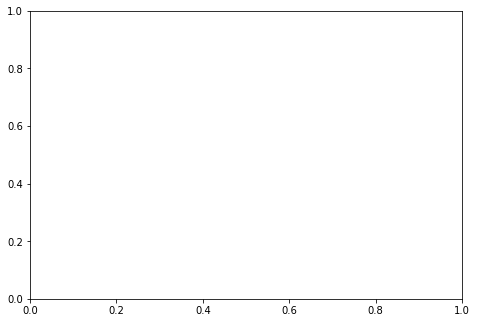

In [179]:
nx.draw(G,pos, node_color = cmap)
nx.draw_networkx_labels(G,pos)
plt.show()

In [ ]:
pos=nx.spring_layout(G, k = 2.5, seed = 5)
pos = nx.fruchterman_reingold_layout(G, k = 1.5, scale = 2)
nx.draw(G,pos, node_color = cmap)
nx.draw_networkx_labels(G,pos)

plt.show()

In [ ]:
print(nx.info(G))
ins = np.zeros(len(loc))
for i in G.nodes():
    ins[i] = G.degree(i, 'weight')

In [ ]:
high = []
med = []
for i in range(len(loc)):
    clust_w = np.log(ins[i] + 1)
    if clust_w > 3: 
        print(i)
        high.append(i)
#    elif clust_w > 0.1: print('m',i)

In [ ]:
#print(np.sum(ins))
#print(ins)

In [ ]:
plt.plot(np.log(ins + 1))

In [ ]:
### REDUNDANT
def present_profile(cluster_p, title, display = False, write = False):
    print('Cluster: ', title)
    
    name_info = cluster_p[0]
    size = len(name_info)
    activity = cluster_p[1]
    cor = cluster_p[2]
    refs = cluster_p[3]
    url = cluster_p[4]
    hashs = cluster_p[5]
    
    r_r = refs[-1]
    r_u = url[-1]
    r_h = hashs[-1]
    
    if np.isnan(r_r): r_r = 0
    if np.isnan(r_u): r_u = 0
    if np.isnan(r_h): r_h = 0
    
    dif_r = in_range(size, r_r, 'ref')
    dif_u = in_range(size, r_u, 'url')
    dif_h = in_range(size, r_h, '#')
    
    if write == True:
        f= open( "./social_profile/" + title + ".txt","w+",encoding="utf8")
    
    print('Size: ' , size)
    print('Tweets: ', activity[2])
    print('Activity: ', activity[0])
    print('Correlation: ', cor)
    print('Refs / Cluster / Refd: ', refs[0:2], ' Ratio: ', r_r, 'Dif: ', str(dif_r))
    print('Unique URLs / Shared: ', url[0:2], ' Ratio: ', r_u, 'Dif: ', str(dif_u))
    print('Unique #s / Shared: ', hashs[0:2], ' Ratio: ', r_h, 'Dif: ', str(dif_h))
    print('******************************************************************************')
    
    if write == True:
        f.write('Tweets: ' + str(activity[2]) + '\r\n')
        f.write(str('Activity: ' + str(activity[0]) + '\r\n'))
        f.write(str('Correlation: ' + str(cor) + '\r\n'))
        f.write(str('Refs / Cluster / Refd: ' + str(refs[0:2]) + ' Ratio: ' + str(r_r) + 'Dif: ' + str(dif_r) + '\r\n'))
        f.write(str('Unique URLs / Shared: ' + str(url[0:2]) + ' Ratio: ' + str(r_u) + 'Dif: ' + str(dif_u) +'\r\n'))
        f.write(str('Unique #s / Shared: ' + str(hashs[0:2]) + ' Ratio: ' + str(r_h) + 'Dif: ' + str(dif_h) +'\r\n'))
        f.write(str('******************************************************************************' + '\r\n'))
    
    for i in range(len(name_info)):
        Lang = name_info[i][0]
        if len(name_info[i][1]) == 64: N = 'NAME HASHED'
        else: N = name_info[i][1]
        Desc = name_info[i][2]
        Russian = name_info[i][3]
        tpd = activity[1][i]
        
        if display == True: print(int(tpd), Russian, Lang, N, Desc)
        if write == True: f.write(str(int(tpd))+ ' ' + str(Russian)+ ' ' + str(Lang)+ ' ' + str(N)+ ' ' + str(Desc)+ ' ' + '\r\n')
        
    print('-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-')
    if write == True: f.close
    
    return size, activity[2], dif_r, dif_u, dif_h 

In [ ]:
interp = unpick('interp')

In [ ]:
DATA = []
for k in range(3):
    res = []
    for i in range(len(sizes)):
        size = sizes[i]
        print(size)
        samp = samples[i]
        data = []
        for j in range(samp):
            data.append(expected(size,1,k))
        data = sorted(data)
        data = np.array(data)
        data[np.isnan(data)] = 0
        avg = np.mean(data)
        if samp == 200:
            high = np.mean(data[0:20])
            low = np.mean(data[-20:])
        else:
            high = data[0]
            low = data[-1]
        res.append([low,avg,high])
    DATA.append(res)

for k in range(3):
    res = np.array(DATA[k])
    for i in range(1):
        plt.plot(sizes, res[:,0], c = 'gray', linestyle='dashed')
        plt.plot(sizes, res[:,1])
        plt.plot(sizes, res[:,2], c = 'gray', linestyle='dashed')

#xs = []
#ys = []
#for i in range(1800):
#    i += 5
#    for j in np.linspace(0,0.9,10):
#        val = in_range(i, j, 'url')
#        if val == 0:
#            xs.append(i)
#            ys.append(j)        
#plt.scatter(xs,ys)

In [ ]:
cols = ['r', 'b', 'g']
for k in range(3):
    res = np.array(DATA[k])
    col = cols[k]
    for i in range(1):
        plt.plot(sizes, res[:,0], c = col, linestyle='dashed')
        plt.plot(sizes, res[:,1], c = col)
        plt.plot(sizes, res[:,2], c = col, linestyle='dashed')
plt.xlim(0,150)

In [ ]:
print(x)

In [ ]:
#pick(interp, 'interp')
interp = unpick('interp')